In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

### クラスタリングのための人工データセット

In [2]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

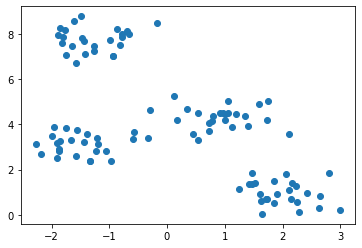

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。<br>
最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。<br>
K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。<br>

In [4]:
def centers_default(X, K):
    random_index_choice = np.sort(np.random.choice(X.shape[0], K, replace=False))
    centers = X[random_index_choice]
    return centers, random_index_choice
centers, random_index_choice = centers_default(X, 4)
centers, random_index_choice

(array([[-1.74836345,  7.06307447],
        [-1.89928142,  2.50466299],
        [-1.26041884,  7.46644456],
        [-1.37778493,  3.58107521]]),
 array([11, 39, 55, 82]))

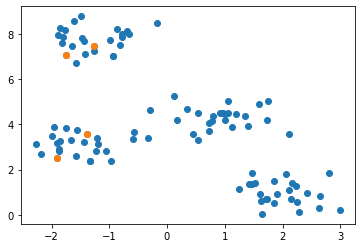

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])
plt.show()

# 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。<br>
K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。<br>
複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。<br>

$SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2$

$n$ : データ点のインデックス<br>
$k$ : クラスタのインデックス<br>
$X_n$ : $n$番目のデータ点<br>
$\mu_k$ : $k$番目の中心点<br>
$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0<br>

In [6]:
def SSE(self, centers, X_merge_list):
    euclidean_array = []
    for x in X_merge_list:
        for i, k in enumerate (centers):
            if  x[2] == i:
                euclidean = 1 * np.sqrt(np.sum((x[0:2] - k)**2))
            else:
                euclidean = 0 * np.sqrt(np.sum((x[0:2] - k)**2))

            euclidean_array = np.append(euclidean_array, euclidean)
    sse = np.sum(euclidean_array)
    return sse     

# 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。<br>
K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。<br>

$\|q-p\| = \sqrt{(q-p)\cdot(q-p)}$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。<br>
numpy.linalg.norm — NumPy v1.17 Manual<br>
中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [7]:
from numpy import linalg as LA

In [8]:
def assign_cluster(X, centers):
    euclidean = np.array([LA.norm((X - k), ord=2, axis=1) for k in centers])    
    euclidean_min = np.min(euclidean.T, axis=1) #各行から最小値を抽出
    nearest_columns_array = np.array([])
    for i, j in zip(euclidean_min, euclidean.T):
        nearest_index = np.where(j == i)
        nearest_columns_array = np.append(nearest_columns_array, nearest_index[-1])
    assign_num = nearest_columns_array
    return  assign_num
    
assign_num = assign_cluster(X, centers)
print(assign_num[random_index_choice])

[0. 1. 2. 3.]


# 【問題4】中心点の移動
中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。
クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [9]:
def centers_move(X, n_clusters, assign_num):
    X_merge = np.hstack([X, assign_num.reshape(100, 1)]) #Xに割り当てたクラスタのインデックスをマージ
    new_centers = np.array([X_merge[np.any(X_merge == i, axis=1)].mean(axis=0) for i in range(n_clusters)])[:, 0:2] #クラスタ毎のデータを抽出し、平均（重心）を出す
    return new_centers
new_centers = centers_move(X, 4, assign_num)
new_centers

array([[-1.64141781,  7.13784182],
       [ 0.71312851,  1.41766504],
       [-1.19701247,  7.88300948],
       [ 0.33210197,  3.67556856]])

# 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。<br>
次のどれかの条件を満たしたらこれを止めます。<br>
- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

# 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。<br>
複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。<br>

# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

- データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。

- データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

## 問題５〜7の回答をScratchKMeansクラスに記載

In [10]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        centers_learned_list = [] #学習した中心を保持するリスト
        X_merge_list = [] #割り当てたクラスタのインデックスをマージしたXを保持するリスト
        for i in range(self.n_init):
            centers = self.centers_default(X, self.n_clusters) #【問題6】異なる初期値で計算
            centers_list = [centers]
            for j in range(self.max_iter):
                assign_num, _ = self.assign_cluster(X, centers_list[-1])
                
                #割当が無いcentersが発生した場合は、ループを抜ける
                if assign_num is None:
                    break
                
                new_centers, X_merge = self.centers_move(X, self.n_clusters, assign_num)
                centers_list.append(new_centers) #更新されたcentersをリストへ格納
                delta_sum = np.sum(LA.norm((centers_list[-1] - centers_list[-2]), ord=2, axis=1))

                #【問題5】繰り返し
                if delta_sum <= self.tol:
                    centers_learned_list.append(centers_list[-1])
                    X_merge_list.append(X_merge)
                    break
                elif j == self.max_iter - 1:
                    centers_learned_list.append(centers_list[-1])
                    X_merge_list.append(X_merge)
                else:
                    pass
        
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print(centers_list)
        
        sse_list = []
        for i, centers in enumerate(centers_learned_list):
            sse = self.SSE(centers, X_merge_list[i])
            sse_list.append(sse)

        self.sse = np.min(np.array(sse_list)) #【問題8】エルボー法の実装
        sse_min_index = np.where(np.min(np.array(sse_list)))
        self.sse_min_index_centers = centers_learned_list[sse_min_index[0][0]]
     
    def SSE(self, centers, X_merge_list):
        euclidean_array = []
        for x in X_merge_list:
            for i, k in enumerate (centers):
                if  x[2] == i:
                    euclidean = 1 * np.sqrt(np.sum((x[0:2] - k)**2))
                else:
                    euclidean = 0 * np.sqrt(np.sum((x[0:2] - k)**2))

                euclidean_array = np.append(euclidean_array, euclidean)
        sse = np.sum(euclidean_array)
        return sse

    def centers_default(self, X, K):
        random_index_choice = np.sort(np.random.choice(X.shape[0], K, replace=False))
        centers = X[random_index_choice]
        return centers

    def assign_cluster(self, X, centers):
        euclidean = np.array([LA.norm((X - k), ord=2, axis=1) for k in centers])
        euclidean_min = np.min(euclidean.T, axis=1) #各行から最小値を抽出
        nearest_columns_array = np.array([])
        for i, j in zip(euclidean_min, euclidean.T):
            nearest_index = np.where(j == i)
            nearest_columns_array = np.append(nearest_columns_array, nearest_index[-1])
        assign_num = nearest_columns_array
        
        #割当が無いcentersが発生した場合はNoneを返し、ループを抜ける
        if len(np.unique(assign_num)) != len(centers):
            assign_num = None
        
        return  assign_num, euclidean

    def centers_move(self, X, n_clusters, assign_num):
        X_merge = np.hstack([X, assign_num.reshape(-1,1)]) #Xに割り当てたクラスタのインデックスをマージ
        new_centers = np.array([X_merge[np.where(X_merge[:, -1] == i)].mean(axis=0) for i in range(n_clusters)])[:, 0:2] #クラスタ毎のデータを抽出し、平均（重心）を出す
        return new_centers, X_merge
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        assign_num, euclidean = self.assign_cluster(X, self.sse_min_index_centers)
        
        
        """
        以下、【問題9】（アドバンス課題）シルエット図 用のコード
        """
        #凝集度計算
        X_merge = np.hstack([X, assign_num.reshape(-1,1)]) #Xに割り当てたクラスタ番号をマージ
        
        i_index_array = ([])
        clusters_list = []
        for i in range(self.n_clusters):  #クラスタ毎のデータを抽出
            i_index = np.where(X_merge[:, -1] == i)
            clusters = X_merge[i_index][:, 0:2]
            i_index_array = np.append(i_index_array, i_index)
            clusters_list.append(clusters)
        
        cohesion_array = ([]) #凝集度アレイ
        for cluster in clusters_list:
            cohesion = np.array([np.mean([LA.norm((cluster - x), ord=2, axis=1)]) for x in cluster])
            cohesion_array = np.append(cohesion_array, cohesion)
        
        cohesion_merge = np.vstack([i_index_array, cohesion_array]).T
        
        #凝集度
        cohesion_sorted = cohesion_merge[np.argsort(cohesion_merge[:, 0])] #入力Xのインデックス順にソートされたcohesion
        
        
        #乖離度計算
        euclidean_2nd = np.sort(euclidean.T, axis=1) [:, 1]#各行から2番目に小さい値を抽出
        columns_2nd_array = np.array([])
        for i, j in zip(euclidean_2nd, euclidean.T):
            index_2nd = np.where(j == i)
            columns_2nd_array = np.append(columns_2nd_array, index_2nd)
        num_2nd = columns_2nd_array
        
        X_merge_2nd = np.hstack([X, num_2nd.reshape(-1,1)]) #Xに2番目に近いクラスタ番号をマージ
            
        #乖離度
        divergence = np.array([np.mean([LA.norm((clusters_list[int(i)] - x), ord=2, axis=1)]) for i, x in zip(X_merge_2nd[:, -1], X_merge_2nd[:, 0:2])])
        
        #シルエット係数
        self.silhouette_vals = (divergence - cohesion_sorted[:, -1]) / np.maximum(divergence, cohesion_sorted[:, -1])
        #シルエット係数の平均値
        self.silhouette_avg = np.mean(self.silhouette_vals)

        return assign_num

In [11]:
#今回スクラッチしたモデル
skm = ScratchKMeans(n_clusters=4, n_init=100, max_iter=300, tol=0.0001, verbose=False)
skm.fit(X) #学習
learned_centers = skm.sse_min_index_centers
pred = skm.predict(X)#推定（クラス）
print(pred)
print(learned_centers)

[3. 1. 3. 3. 3. 3. 2. 1. 3. 1. 1. 1. 1. 1. 1. 0. 0. 2. 2. 0. 3. 1. 2. 0.
 3. 2. 2. 3. 0. 0. 0. 1. 0. 0. 2. 3. 1. 0. 1. 2. 3. 2. 1. 2. 2. 1. 0. 2.
 3. 3. 3. 0. 2. 2. 2. 1. 1. 0. 0. 1. 1. 0. 0. 3. 0. 1. 2. 2. 0. 3. 1. 0.
 3. 1. 3. 3. 2. 2. 0. 0. 0. 1. 2. 3. 0. 2. 0. 0. 3. 3. 3. 2. 3. 2. 2. 1.
 1. 2. 1. 3.]
[[ 1.99186903  0.96561071]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]
 [ 0.92578447  4.32475792]]


<function matplotlib.pyplot.show(*args, **kw)>

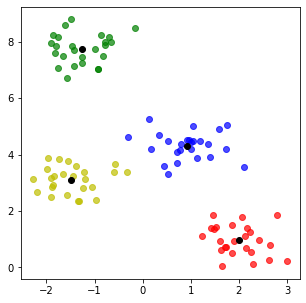

In [12]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(pred):
    index = np.where(pred == cluster)
    plt.scatter(X[index, 0], X[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.scatter(learned_centers[:, 0], learned_centers[:, 1], c="k")
plt.show

In [13]:
#KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=100, max_iter=300, tol=0.0001)
kmeans.fit(X)
pred = kmeans.predict(X)
print(pred)
print(kmeans.cluster_centers_)

[1 2 1 1 1 1 3 2 1 2 2 2 2 2 2 0 0 3 3 0 1 2 3 0 1 3 3 1 0 0 0 2 0 0 3 1 2
 0 2 3 1 3 2 3 3 2 0 3 1 1 1 0 3 3 3 2 2 0 0 2 2 0 0 1 0 2 3 3 0 1 2 0 1 2
 1 1 3 3 0 0 0 2 3 1 0 3 0 0 1 1 1 3 1 3 3 2 2 3 2 1]
[[ 1.99186903  0.96561071]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]]


<function matplotlib.pyplot.show(*args, **kw)>

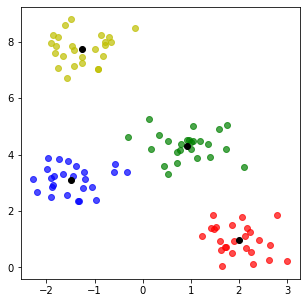

In [14]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(pred):
    index = np.where(pred == cluster)
    plt.scatter(X[index, 0], X[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="k")
plt.show

## sklearnと同じ結果となった。

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 𝑘 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 𝑘 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 𝑘 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

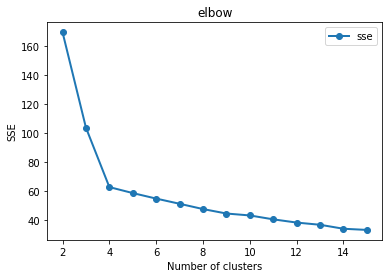

In [15]:
def elbow(X, n_clusters):
    sse_list = []
    n_list = []
    for n in range(2, n_clusters + 1):
        skm = ScratchKMeans(n_clusters=n, n_init=100, max_iter=300, tol=0.0001, verbose=False)
        skm.fit(X) #学習
        sse_list = np.append(sse_list, skm.sse)
        n_list.append(n)

    plt.title("elbow")
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.plot(n_list, sse_list, label="sse", marker="o", linewidth=2)
    plt.legend()
    plt.show()
    
elbow(X, 15)

## 今回のデータではk＝４が適切と思われる。

# 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n = \frac{b_n-a_n}{max(b_n,a_n)}
$$

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。


《シルエット図を表示するためのコード》

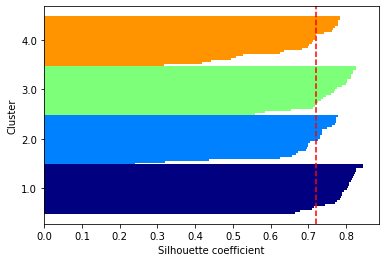

In [16]:
def silhouette(X, n_clusters):
    skm = ScratchKMeans(n_clusters=n_clusters, n_init=100, max_iter=300, tol=0.0001, verbose=False)
    skm.fit(X) #学習
    skm.predict(X)
    silhouette_vals = skm.silhouette_vals
    silhouette_avg = skm.silhouette_avg
    y_km = skm.predict(X)
    cluster_labels = np.unique(y_km)
    n_clusters = skm.n_clusters

    from matplotlib import cm
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()
    
silhouette(X, 4)

# 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

# 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。


《PCAのサンプルコード》

《PCAの分散説明率を表示するコードサンプル》

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [17]:
df = pd.read_csv("/Users/takahashihideyuki/dive/diveintocode-ml/Sprint_/Wholesale customers data.csv", encoding="utf-8")
df_money= df.iloc[:, 2:]
df_money

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [18]:
#標準化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_money)
df_money_std = mms.transform(df_money)
df_money_std

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

[0.51948323 0.7835533  0.8896143  0.95219446 0.98716868 1.        ]


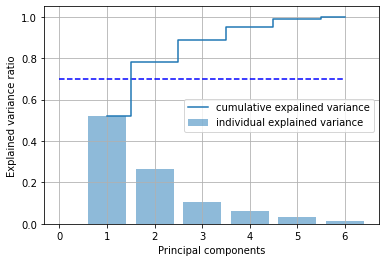

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df_money_std)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### 上位２つの主成分で寄与率は７０％を超える。

In [20]:
#2次元に次元削減
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_money_std)
data_pca = pca.transform(df_money_std)
data_pca

array([[ 2.04458516e-02, -4.12432441e-03],
       [ 4.50032876e-02, -3.68885887e-02],
       [ 4.04741364e-02, -1.37459744e-02],
       [-9.22945828e-02,  2.87862771e-02],
       [-2.05136946e-02,  1.06330131e-01],
       [-1.73601626e-02, -2.63839647e-02],
       [-2.02663728e-02, -2.75686539e-02],
       [ 1.34428642e-02, -4.19964429e-02],
       [-4.33457440e-02, -6.89173239e-02],
       [ 1.77908992e-01, -5.74558336e-02],
       [ 7.91302688e-02, -6.76192459e-02],
       [-9.09981700e-02, -1.08074382e-02],
       [ 8.30153765e-02,  1.52954330e-01],
       [ 1.04032659e-01,  5.58561642e-02],
       [ 8.45682206e-02,  8.44283320e-02],
       [-8.82149773e-02, -4.14339105e-02],
       [ 7.37814710e-02, -1.03489144e-01],
       [-6.19167026e-02, -3.94995869e-02],
       [ 1.70659505e-02,  5.42715317e-02],
       [-1.87851469e-02, -5.99249508e-02],
       [-3.85352174e-02,  3.12438135e-02],
       [-1.10248319e-01, -5.60456803e-02],
       [-5.56739412e-02,  1.94613953e-01],
       [ 3.

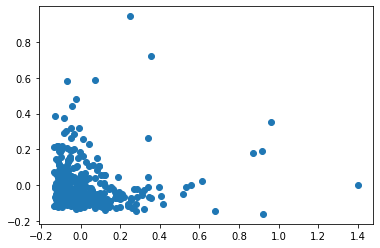

In [21]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()

### 次元削減後のデータをプロット。直感的にクラスタ分類できるような分布ではない。

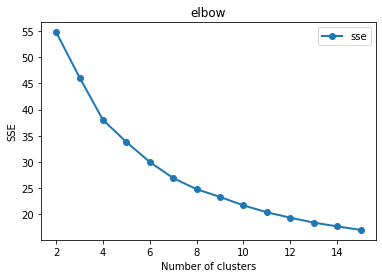

In [22]:
elbow(data_pca, 15)

### 明確なエルボーは無い。4付近が候補か。

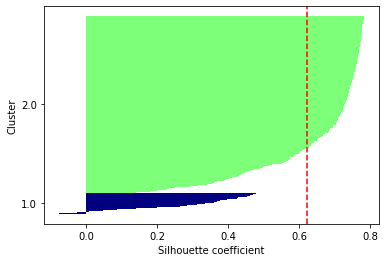

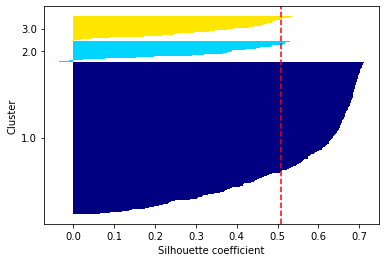

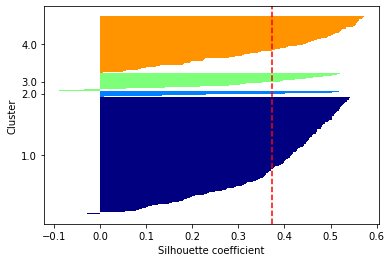

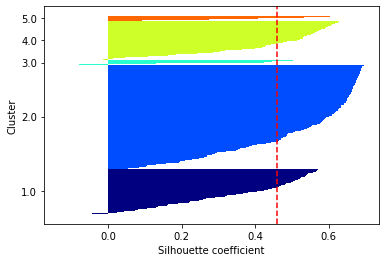

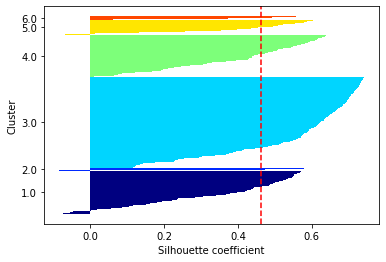

In [23]:
for i in range(2, 7):
    silhouette(data_pca, i)

### シルエット図の形状も良くない。３〜４あたりか。

In [70]:
#今回スクラッチしたモデル
skm = ScratchKMeans(n_clusters=3, n_init=100, max_iter=300, tol=0.0001, verbose=False)
skm.fit(data_pca) #学習
learned_centers = skm.sse_min_index_centers
pred_3 = skm.predict(data_pca)#推定（クラス）
# print(pred)
# print(learned_centers)

<function matplotlib.pyplot.show(*args, **kw)>

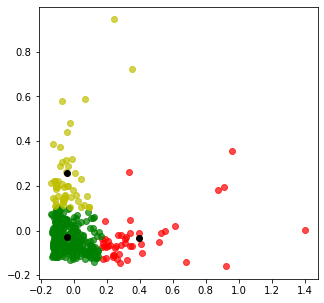

In [71]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(pred):
    index = np.where(pred == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.scatter(learned_centers[:, 0], learned_centers[:, 1], c="k")
plt.show

### エルボー法やシルエット図を活用しても、明確に良いと言えるクラスタ数を判断することは難しい。卸売業者の目線で考えると、「顧客への営業方針、物流の効率化」等を判断したいと考えられる為、今回のデータの中身及び主成分分析後のデータ分布を考慮すると、「第１主成分を主に購入している顧客、第２主成分を主に購入している顧客、両方を同じくらい購入している顧客」の３クラスタに分類するのが妥当と考える。

# 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

### Channelを可視化

In [26]:
channel = df.iloc[:, 0]
channel.unique()

array([2, 1])

<function matplotlib.pyplot.show(*args, **kw)>

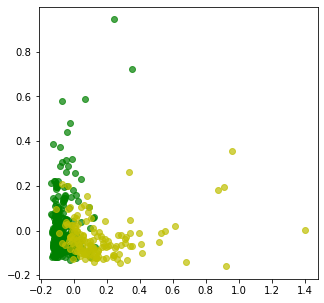

In [27]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(channel):
    index = np.where(channel == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.show

### Regionを可視化

In [28]:
Region = df.iloc[:, 1]
Region.unique()

array([3, 1, 2])

<function matplotlib.pyplot.show(*args, **kw)>

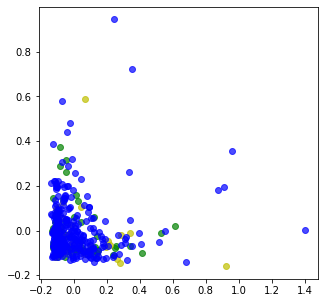

In [29]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(Region):
    index = np.where(Region == cluster)
    plt.scatter(data_pca[index, 0], data_pca[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.show

### Channelは２クラス、Regionは３クラスに分かれている。Channelは第１主成分側と第２主成分側で分かれている傾向が見られ、これはk-meansの３クラスタ分類と似ている部分である。Regionは主成分に関係なく分布しており、k-meansの３クラスタ分類との共通点は見られない。

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation



In [30]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_ag

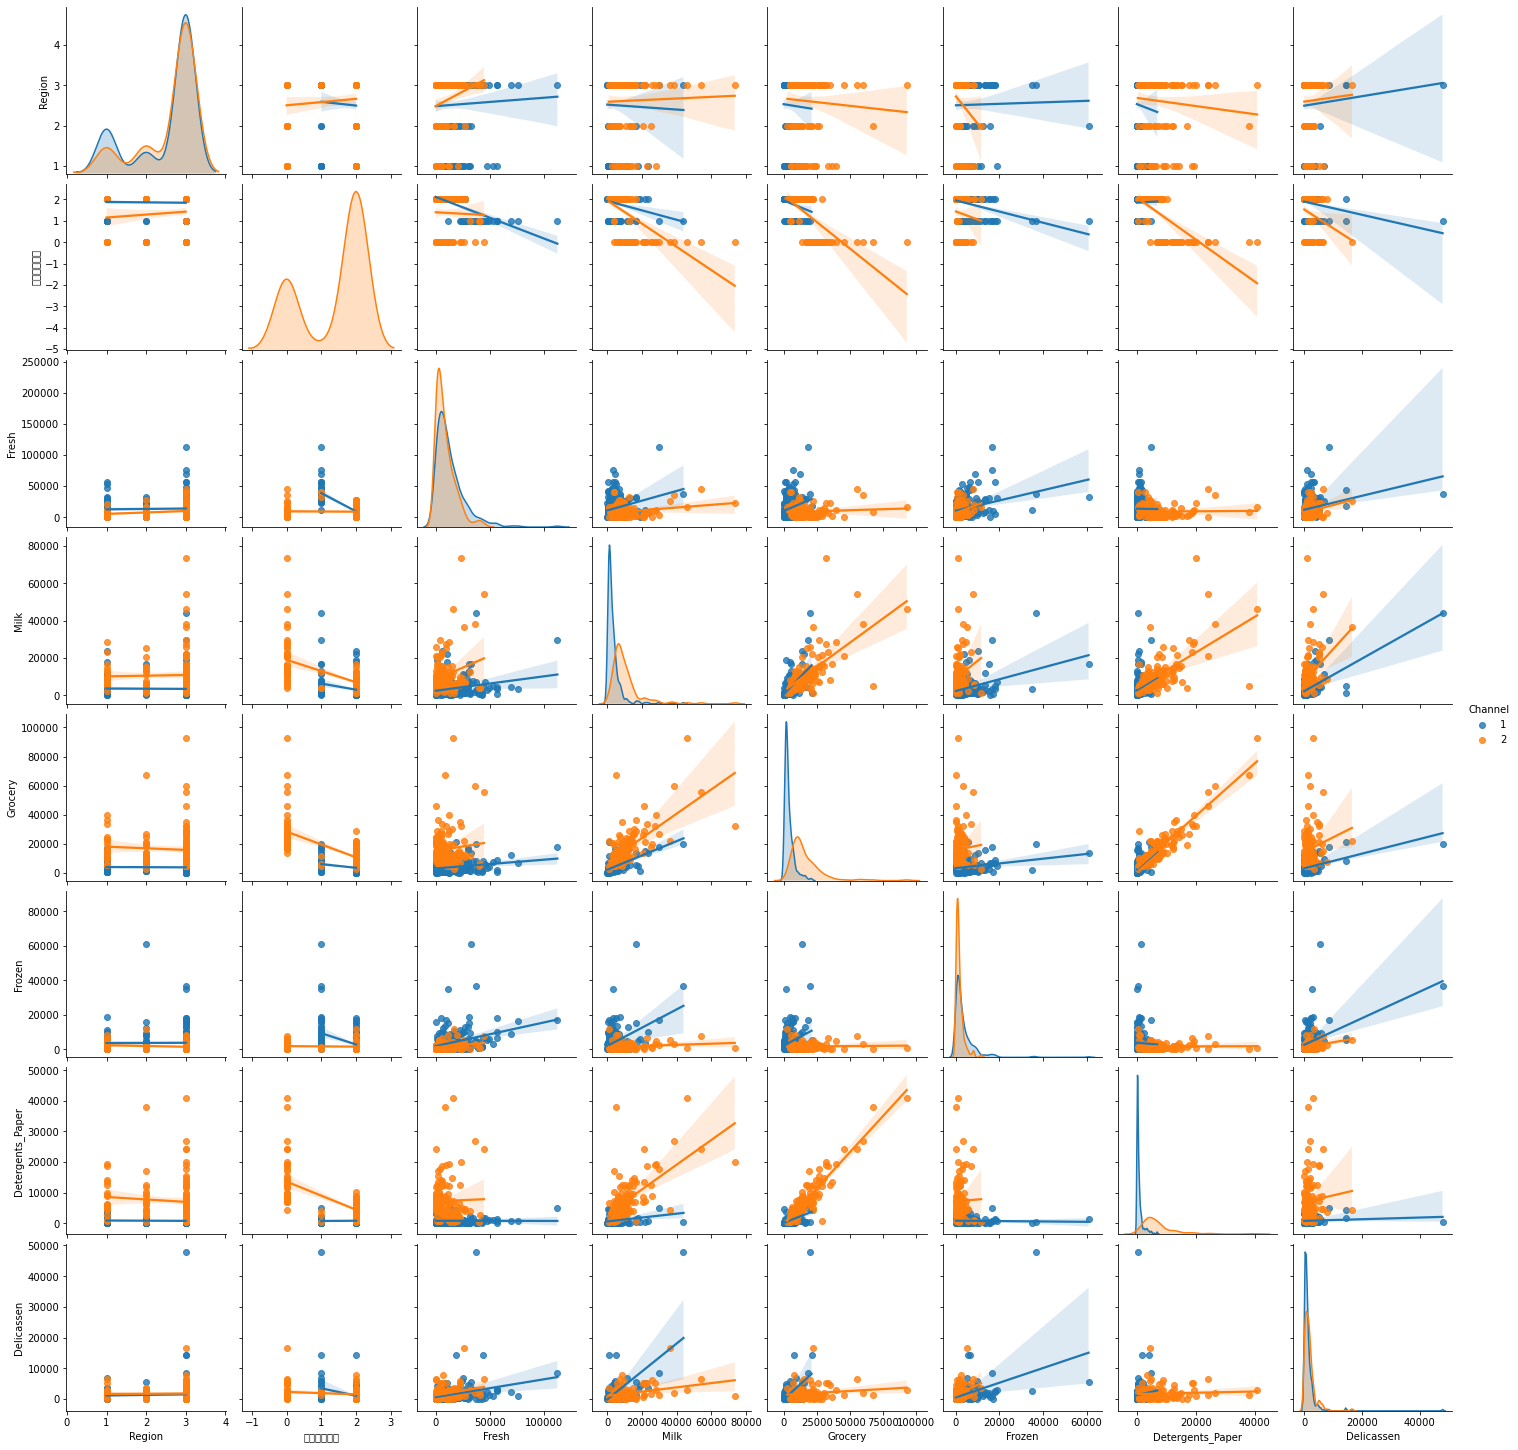

In [80]:
sns.pairplot(df, hue='Channel', kind='reg')

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


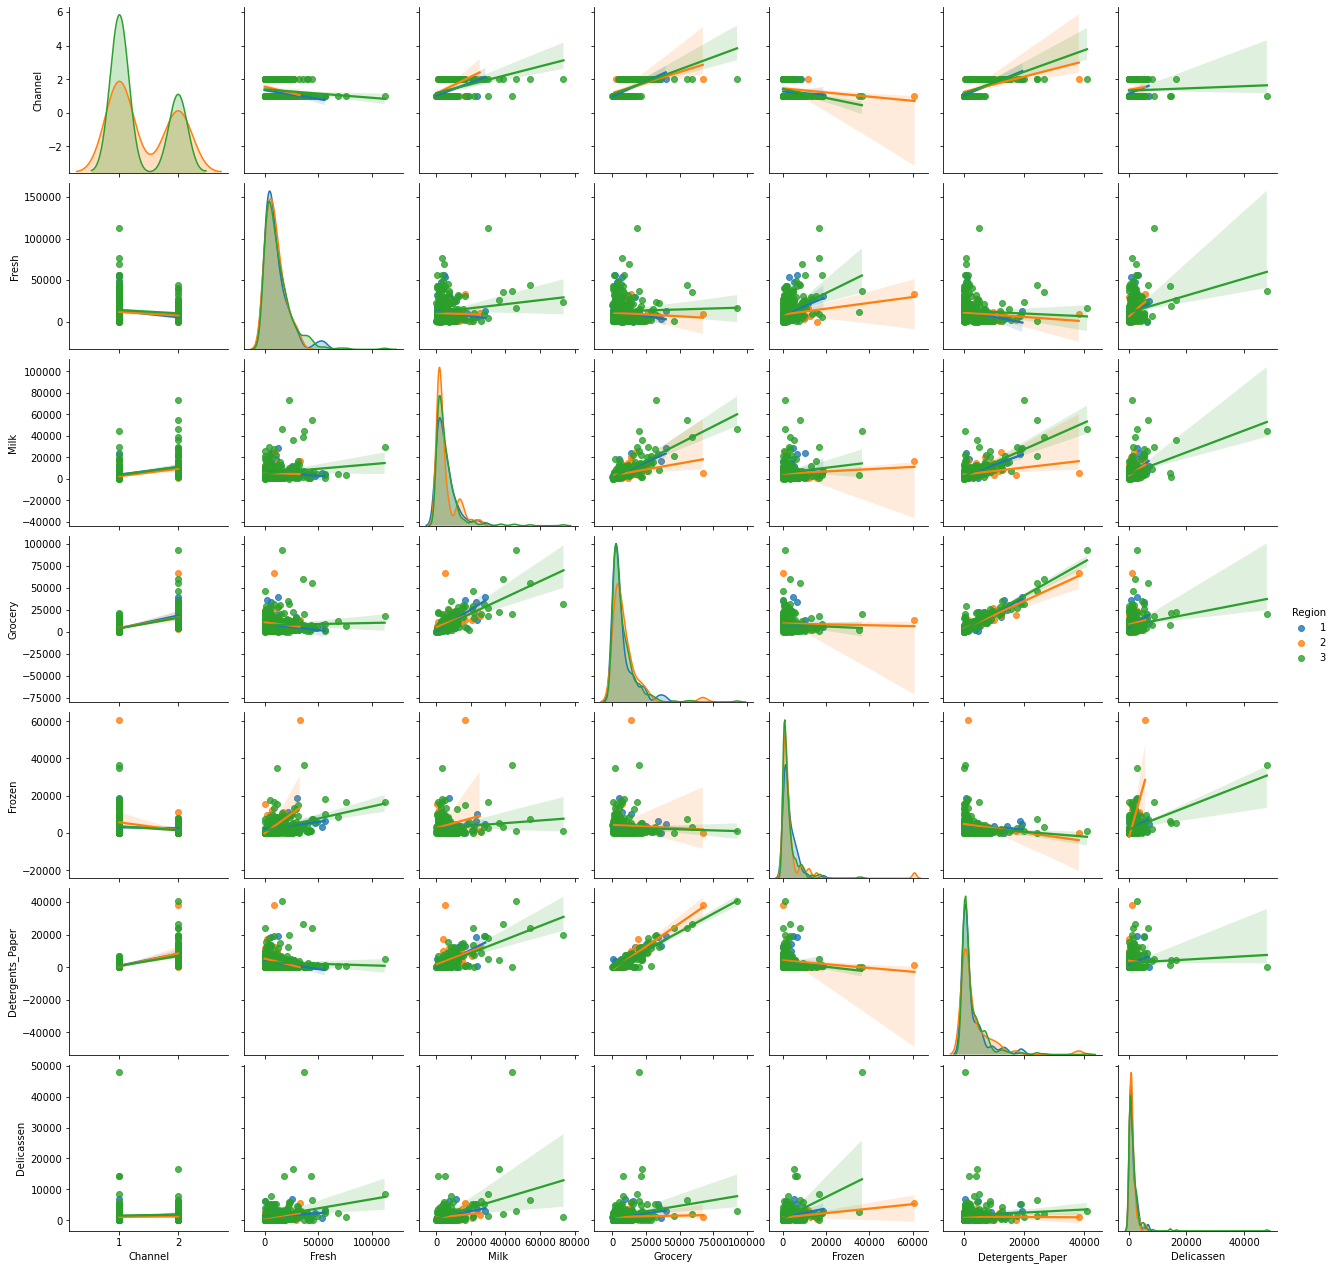

In [37]:
sns.pairplot(df, hue='Region', kind='reg')

In [31]:
df.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


In [32]:
df.groupby(['Region']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [73]:
df_g = df.groupby(['Channel', 'Region']).mean()
df_g

Fresh          Milk       Grocery       Frozen  \
Channel Region                                                          
1       1       12902.254237   3870.203390   4026.135593  3127.322034   
        2       11650.535714   2304.250000   4395.500000  5745.035714   
        3       13878.052133   3486.981043   3886.734597  3656.900474   
2       1        5200.000000  10784.000000  18471.944444  2584.111111   
        2        7289.789474   9190.789474  16326.315789  1540.578947   
        3        9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper   Delicassen  
Channel Region                                 
1       1             950.525424  1197.152542  
        2             482.714286  1105.892857  
        3             786.682464  1518.284360  
2       1            8225.277778  1871.944444  
        2            8410.263158  1239.000000  
        3            6899.238095  1826.209524

In [76]:
df.insert(2, 'クラスタ分類', pred_3.reshape(-1, 1))

In [77]:
df_k = df.groupby(['Channel', 'Region', 'クラスタ分類']).mean()
df_k

Fresh          Milk       Grocery        Frozen  \
Channel Region クラスタ分類                                                           
1       1      1.0     36980.500000   5351.250000   6641.000000   6693.625000   
               2.0      9125.274510   3637.882353   3615.960784   2567.901961   
        2      1.0     31176.000000   9559.500000  10953.000000  31957.500000   
               2.0     10148.576923   1746.153846   3891.076923   3728.692308   
        3      1.0     39476.705882   6295.176471   5705.205882   8636.500000   
               2.0      8960.796610   2947.553672   3537.423729   2700.367232   
2       1      0.0      4999.000000  17162.428571  28280.571429   2995.714286   
               2.0      5327.909091   6725.000000  12230.090909   2322.181818   
        2      0.0      5564.250000  12870.875000  26407.875000   1187.250000   
               2.0      8544.727273   6514.363636   8994.272727   1797.545455   
        3      0.0      9884.928571  21533.178571  29755.821429   1809.821429   
               1.0     37371.333333   6726.333333   7529.333333    727.666667   
               2.0      8694.810811   7160.783784  11072.959459   1432.810811   

                       Detergents_Paper   Delicassen  
Channel Region クラスタ分類                                 
1       1      1.0           548.625000  2586.500000  
               2.0          1013.568627   979.215686  
        2      1.0           821.500000  2863.000000  
               2.0           456.653846   970.730769  
        3      1.0           760.764706  3721.382353  
               2.0           791.661017  1095.090395  
2       1      0.0         13884.428571  1797.714286  
               2.0          4624.000000  1919.181818  
        2      0.0         14021.875000  1126.875000  
               2.0          4329.090909  1320.545455  
        3      0.0         13735.750000  2738.821429  
               1.0          2330.333333  2148.000000  
               2.0          4497.675676  1467.851351

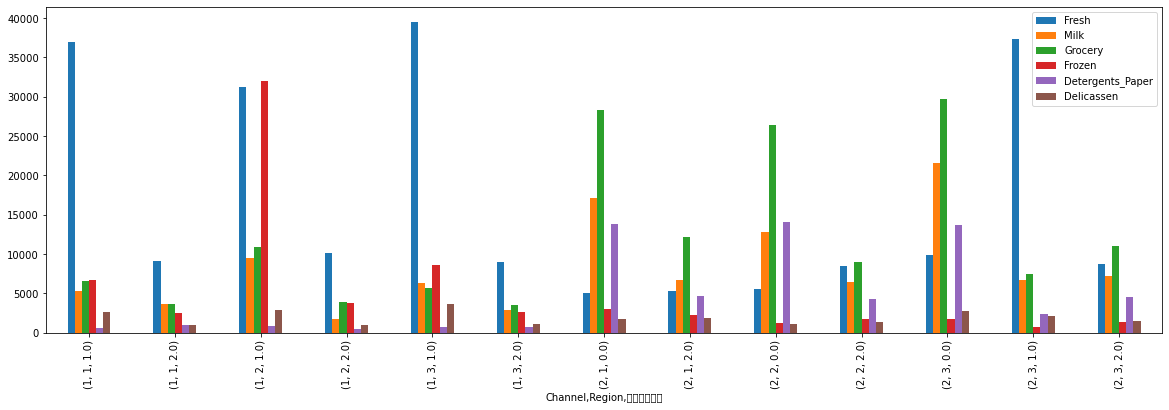

In [87]:
df_k.plot(kind='bar', figsize=(20, 6))

### 既存グループにクラスタ３分類の結果をプラスしてグルーピングを実施。クラスタ分類１にてFreshが良く売れており、Channel２のクラスタ分類０でMilk、Grocery、Detergents_Paperが良く売れている。また、FrozenはChannl１・Region２・クラスタ分類１のグループにてピンポイントで売れている。

### これらの情報を、売れ行き好調なグループへのさらなる販促、不調グループのテコ入れor見切り等の判断材料とすることで、より効率的な経営につながると思われる。

# 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。

DBSCAN

メリット:
1. 事前にデータのクラスタ数を明示的に指定する必要が無い。
2. 任意の形状のクラスタを見つけることができる。
3. ノイズという概念を持っており、外れ値に対してロバスト性がある。
4. 必要なパラメータは 2 つだけであり、たいていはデータ点の順序に影響を受けない。

デメリット:
1. 完全に決定論的というわけではなく、データが処理される順序に依存する。
2. ユークリッド距離等の距離尺度に依存する。
3. 密度に大きな違いのあるデータ集合をクラスタリングできない。
4. データおよびスケールをよく理解していなければ、意味のある距離閾値を選ぶことが困難。

t-SNE

メリット：
1. 高次元の局所的な構造を非常によく捉える。
2. 大局的な構造も可能な限り捉える。

デメリット：
1. Perplexity(内部のパラメータ)を変えると全くことなるクラスターが出現してしまう。

LLE

メリット：
1. 大域的な位置関係を保存できる。

デメリット：
1. 多様体が複数ある場合、互いの位置関係をうまく保存できない。
2. 圧縮後のデータ位置を再構成する計算量がデータ数の2乗に比例するため、大規模なデータに適用しづらい。

# 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。

In [100]:
from sklearn.manifold import TSNE
df_TSNE = TSNE(n_components=2).fit_transform(df_money)
df_TSNE.shape

(440, 2)

In [175]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=3.5, min_samples=14)
pred = dbs.fit_predict(df_TSNE)
np.unique(pred)

array([-1,  0,  1,  2])

<function matplotlib.pyplot.show(*args, **kw)>

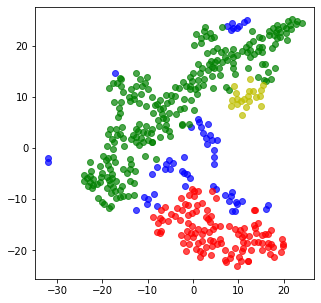

In [176]:
c_map = ['r', 'g', 'y', 'b']

plt.figure(figsize=(5, 5))
for cluster in np.unique(pred):
    index = np.where(pred == cluster)
    plt.scatter(df_TSNE[index, 0], df_TSNE[index, 1], 
                marker="o", alpha=0.7, c=c_map[int(cluster)])
plt.show

### PCA+kmeansと比較し、次元削減後のデータ分布も異なれば、クラスタ分類も異なる。今後、ハイパーパラメータについても理解を深め、クラスタリング手法としてK-meansと合わせて扱えるようにしていく。